In [7]:
%matplotlib inline
import json
import os
import pandas as pd
import numpy as np
import fastcluster
from scipy.cluster.hierarchy import dendrogram, to_tree
import seaborn as sns
from ete3 import Tree, ClusterTree, TreeStyle, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node

In [2]:
def joinpath(a, *args):
    return os.path.join(a, *args)

In [3]:
input_dir = "/media/pika/Workbench/workspace/pywgMLST/profiling2"
profile_file = joinpath(input_dir, "wgmlst.tsv")

In [4]:
profiles = pd.read_csv(profile_file, sep="\t", index_col=0)
profiles

,Assembly_1,Assembly_10,Assembly_11,Assembly_12,Assembly_13,Assembly_14,Assembly_15,Assembly_16,Assembly_17,Assembly_18,...,Assembly_6,Assembly_60,Assembly_61,Assembly_62,Assembly_63,Assembly_64,Assembly_65,Assembly_7,Assembly_8,Assembly_9
SAL0000001,NaN,NaN,NaN,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,NaN,NaN,NaN,NaN,...,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,NaN,NaN
SAL0000003,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,NaN,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,NaN,...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN
SAL0000004,NaN,NaN,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,...,NaN,NaN,NaN,NaN,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN
SAL0000005,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...
SAL0000006,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN,...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN
SAL0000007,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,NaN,NaN,NaN,NaN,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,NaN
SAL0000008,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,NaN,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,NaN,...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,NaN,NaN
SAL0000009,2070946759f1a505912e692b889c98802247fa11cd64bf...,NaN,NaN,NaN,2070946759f1a505912e692b889c98802247fa11cd64bf...,2070946759f1a505912e692b889c98802247fa11cd64bf...,NaN,2070946759f1a505912e692b889c98802247fa11cd64bf...,NaN,NaN,...,NaN,

In [5]:
with open(joinpath(input_dir, "namemap.json"), "r") as f:
    namemap = json.loads("".join(f.readlines()))
namemap

{'Assembly_1': 'SRR3028736_1 (paired) assembly',
 'Assembly_10': 'SRR3028745_1 (paired) assembly',
 'Assembly_11': 'SRR3028746_1 (paired) assembly',
 'Assembly_12': 'SRR3028747_1 (paired) assembly',
 'Assembly_13': 'SRR3028748_1 (paired) assembly',
 'Assembly_14': 'SRR3028749_1 (paired) assembly',
 'Assembly_15': 'SRR3028750_1 (paired) assembly',
 'Assembly_16': 'SRR3028751_1 (paired) assembly',
 'Assembly_17': 'SRR3028752_1 (paired) assembly',
 'Assembly_18': 'SRR3028753_1 (paired) assembly',
 'Assembly_19': 'SRR3028754_1 (paired) assembly',
 'Assembly_2': 'SRR3028737_1 (paired) assembly',
 'Assembly_20': 'SRR3028755_1 (paired) assembly',
 'Assembly_21': 'SRR3028756_1 (paired) assembly',
 'Assembly_22': 'SRR3028757_1 (paired) assembly',
 'Assembly_23': 'SRR3028758_1 (paired) assembly',
 'Assembly_24': 'SRR3028759_1 (paired) assembly',
 'Assembly_25': 'SRR3028760_1 (paired) assembly',
 'Assembly_26': 'SRR3028761_1 (paired) assembly',
 'Assembly_27': 'SRR3028762_1 (paired) assembly',
 '

In [6]:
namemap = {k: v.replace(" (paired) assembly", "") for k, v in namemap.items()}
profiles = profiles.rename(columns=namemap)

In [10]:
profiles

,SRR3028736_1,SRR3028745_1,SRR3028746_1,SRR3028747_1,SRR3028748_1,SRR3028749_1,SRR3028750_1,SRR3028751_1,SRR3028752_1,SRR3028753_1,...,SRR3028741_1,SRR3684173_1,SRR3684194_1,SRR3711252_1,SRR3711286_1,SRR3711296_1,SRR3712208_1,SRR3028742_1,SRR3028743_1,SRR3028744_1
SAL0000001,NaN,NaN,NaN,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,NaN,NaN,NaN,NaN,...,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,9b5a0e48fe1ada671dc248cd06e9debf2e9de52c64c478...,NaN,NaN,NaN
SAL0000003,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,NaN,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,NaN,...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,4734cc4387386b644a00a4ac0f877ca1998890b6c8fbf9...,NaN
SAL0000004,NaN,NaN,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,...,NaN,NaN,NaN,NaN,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN,1da74f5acb74569b55d8481147ebe87be96a52da84c02e...,NaN
SAL0000005,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,NaN,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...,318c25e38bfd3f9bde45cf17f491f7a1fdd0b5165d2ca9...
SAL0000006,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN,...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,7f164eec678d71942635c5cbeada8f31f71914d5322fc8...,NaN,NaN
SAL0000007,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,NaN,NaN,NaN,NaN,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,6c6cf2e45aa142857c22404b67d5a12a7a8f4ea897b907...,NaN
SAL0000008,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,NaN,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,NaN,...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,cb08b609d749a5e0f119680fede1de9b62a2b864545403...,NaN,NaN,NaN
SAL0000009,2070946759f1a505912e692b889c98802247fa11cd64bf...,NaN,NaN,NaN,2070946759f1a505912e692b889c98802247fa11cd64bf...,2070946759f1a505912e692b889c98802247fa11cd64bf...,NaN,2070946759f1a505912e692b889c98802247fa11c

In [14]:
def hamming(xs, ys):
    results = 0
    for x, y in zip(xs, ys):
        if type(x) == float and type(y) == float and np.isnan(x) and np.isnan(y):
            pass
        elif x != y:
            results += 1
    return results

In [15]:
distances = pd.DataFrame(index=profiles.columns, columns=profiles.columns)
for x in profiles.columns:
    for y in profiles.columns:
        distances.loc[x, y] = hamming(profiles[x], profiles[y])

In [16]:
distances

,SRR3028736_1,SRR3028745_1,SRR3028746_1,SRR3028747_1,SRR3028748_1,SRR3028749_1,SRR3028750_1,SRR3028751_1,SRR3028752_1,SRR3028753_1,...,SRR3028741_1,SRR3684173_1,SRR3684194_1,SRR3711252_1,SRR3711286_1,SRR3711296_1,SRR3712208_1,SRR3028742_1,SRR3028743_1,SRR3028744_1
SRR3028736_1,0,1730,1388,1679,1845,1846,1868,1289,1197,1675,...,1528,1299,1972,1344,1473,2316,1769,1575,1425,1765
SRR3028745_1,1730,0,1413,1618,1669,1994,1889,2184,1912,1900,...,1516,2267,1780,2162,1636,1727,1979,1171,1871,2343
SRR3028746_1,1388,1413,0,1754,1688,1668,1533,1867,2264,1374,...,1261,1699,1650,1710,1660,1579,1284,860,1469,2060
SRR3028747_1,1679,1618,1754,0,2026,2556,1129,1849,1346,996,...,1609,1988,1456,1660,2174,1744,2037,1426,1789,1502
SRR3028748_1,1845,1669,1688,2026,0,1444,1903,2621,1482,1886,...,1429,1915,2135,2006,1138,1904,1800,1731,2209,1852
SRR3028749_1,1846,1994,1668,2556,1444,0,2131,1671,2010,2116,...,1897,1827,2286,2140,1436,1988,1408,1829,1294,1839
SRR3028750_1,1868,1889,1533,1129,1903,2131,0,2048,1437,1183,...,1847,1987,1134,1185,2403,1659,2306,1710,1902,1375
SRR3028751_1,1289,2184,1867,1849,2621,1671,2048,0,1815,1841,...,2086,1733,1982,1321,1879,1917,1552,1814,1288,1836
SRR3028752_1,1197,1912,2264,1346,1482,2010,1437,1815,0,1172,...,1987,1526,1689,1574,1886,2018,2689,1903,1748,976
SRR3028753_1,1675,1900,1374,996,1886,2116,1183,1841,1172,0,...,1852,1533,1283,1662,2388,1640,2151,1392,1676,1354


In [17]:
linkage = fastcluster.average(distances)

In [18]:
tree = to_tree(linkage, False)

In [19]:
def linkage2newick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "{}:{:.2f}{}".format(leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):{:.2f}{}".format(parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = linkage2newick(node.get_left(), newick, node.dist, leaf_names)
        newick = linkage2newick(node.get_right(), ",{}".format(newick), node.dist, leaf_names)
        newick = "({}".format(newick)
        return newick

In [20]:
newick = linkage2newick(tree, "", tree.dist, list(profiles.columns))

In [21]:
t = Tree(newick)
print(t)


                           /-SRR3028742_1
                        /-|
                     /-|   \-SRR3028755_1
                    |  |
                  /-|   \-SRR3028746_1
                 |  |
                 |  |   /-SRR3028781_1
               /-|   \-|
              |  |      \-SRR3028762_1
              |  |
              |  |   /-SRR3028741_1
            /-|   \-|
           |  |      \-SRR3028754_1
           |  |
           |  |   /-SRR3028785_1
           |   \-|
           |      \-SRR3028745_1
         /-|
        |  |         /-SRR3028787_1
        |  |      /-|
        |  |   /-|   \-SRR3028738_1
        |  |  |  |
        |  |  |   \-SRR3028786_1
        |   \-|
        |     |      /-SRR3028744_1
        |     |   /-|
        |      \-|   \-SRR3028764_1
        |        |
        |         \-SRR3028792_1
        |
        |               /-SRR3028757_1
        |            /-|
      /-|         /-|   \-SRR3028736_1
     |  |        |  |
     |  |      /-|   \-SRR30

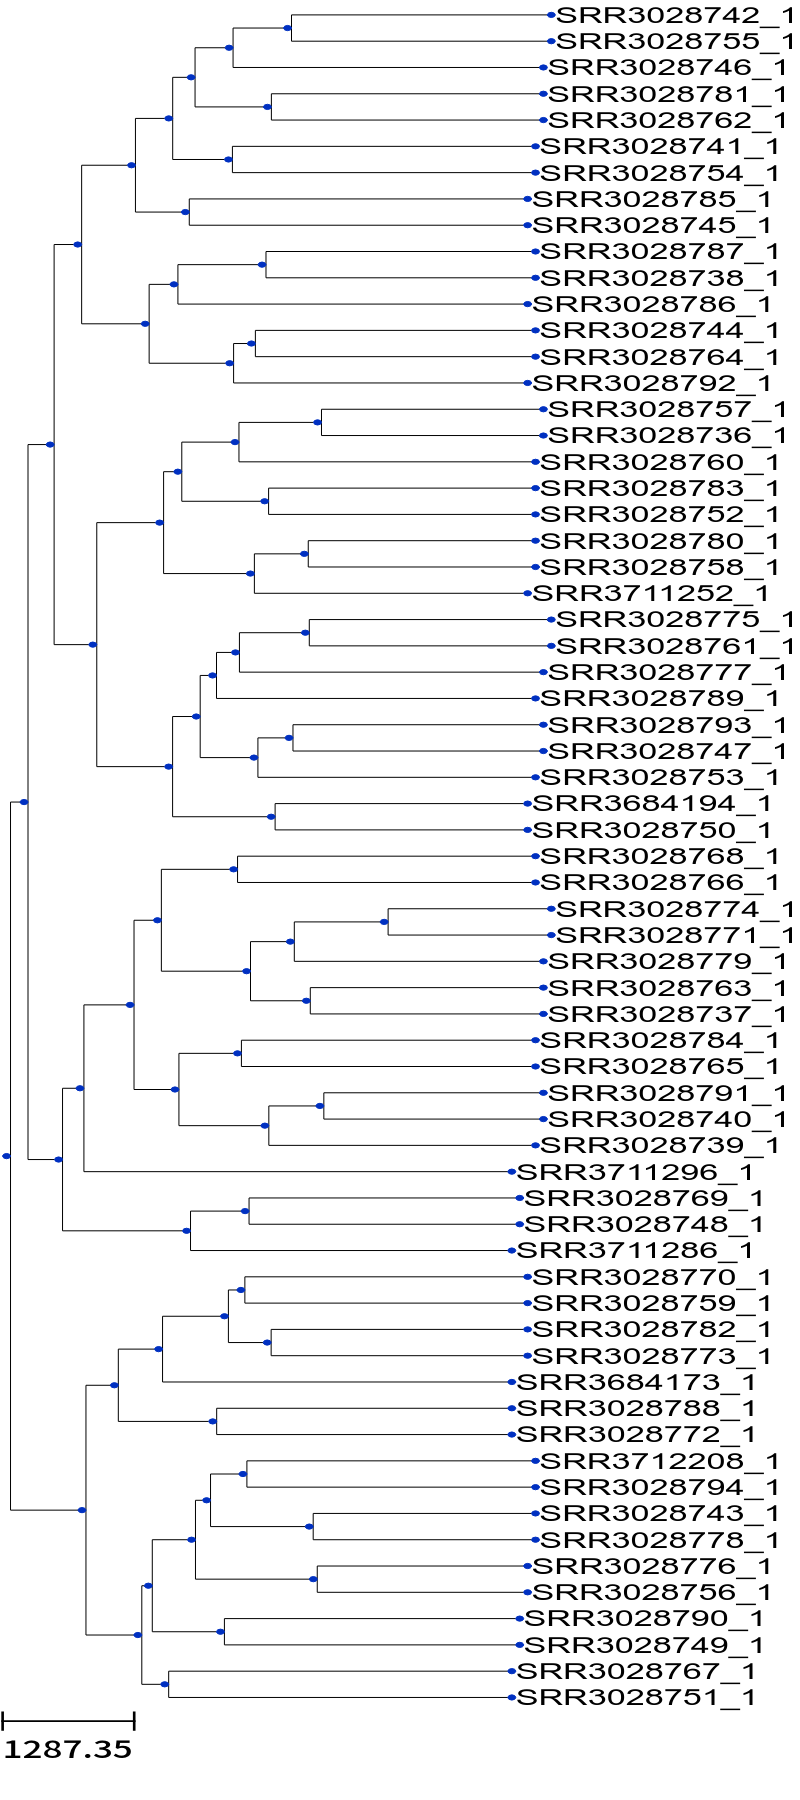

In [22]:
t.render("%%inline", w=800, h=1800, units="px", dpi=300)

In [25]:
cmap = sns.dark_palette("yellow", reverse=True, as_cmap=True)

/usr/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

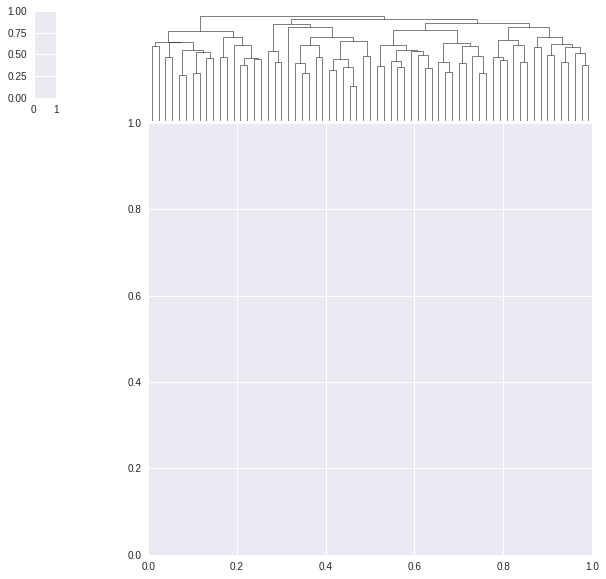

In [26]:
sns.clustermap(distances, col_linkage=linkage, row_cluster=False, yticklabels=[], cmap=cmap)

In [23]:
with open(joinpath(input_dir, "S.Heidelberg.newick"), "w") as file:
    file.write(newick)